In [98]:
# importing libraries
import pandas as pd
import matplotlib as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

import pickle

In [2]:
# finding useful methods for libraries
dir(pd)

['ArrowDtype',
 'BooleanDtype',
 'Categorical',
 'CategoricalDtype',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'DatetimeTZDtype',
 'ExcelFile',
 'ExcelWriter',
 'Flags',
 'Float32Dtype',
 'Float64Dtype',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int16Dtype',
 'Int32Dtype',
 'Int64Dtype',
 'Int8Dtype',
 'Interval',
 'IntervalDtype',
 'IntervalIndex',
 'MultiIndex',
 'NA',
 'NaT',
 'NamedAgg',
 'Period',
 'PeriodDtype',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseDtype',
 'StringDtype',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'UInt16Dtype',
 'UInt32Dtype',
 'UInt64Dtype',
 'UInt8Dtype',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__git_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_built_with_meson',
 '_config',
 '_is_numpy_dev',
 '_libs',
 '_pandas_datetime_CAPI',
 '_pandas_parser_CAPI',
 '_testing',
 '_typing',
 '_version_meson',
 'annota

In [3]:
# loading and viewing the data set
# df variable is for datagframe
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# finding the number of rows and columns of the data set
df.shape

(768, 9)

In [5]:
# seeing column names
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# seeing if there are any null values
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [7]:
# total null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# glucose and blood pressure and BMI as well, cannot be 0 as we see in the min row

In [15]:
# finding total number of 0 values in the data for the columns of glucose,bmi, and bp

#print((df["Glucose"] == 0.sum()))
glucose = sum(df["Glucose"] == 0)
bp = sum(df["BloodPressure"] == 0)
bmi = sum(df["BMI"] == 0)
skinthickness = sum(df["SkinThickness"] == 0)
insulin = sum(df["Insulin"] == 0)

print(glucose,bp,bmi)
print( skinthickness, insulin)
#print(glucose)
#print(bp)
#print(bmi)

0 0 0
0 0


In [14]:
# replacing 0s with proper values, here we will be using median(50%) to replace them

df.loc[df["Glucose"]==0,"Glucose"] = df["Glucose"].median()
df.loc[df["BloodPressure"]==0,"BloodPressure"] = df["BloodPressure"].median()
df.loc[df["BMI"]==0,"BMI"] = df["BMI"].median()
df.loc[df["SkinThickness"]==0,"SkinThickness"] = df["SkinThickness"].median()
df.loc[df["Insulin"]==0,"Insulin"] = df["Insulin"].median()

In [17]:
# DATA CLEANING DONE

In [18]:
# Exploratory data analysis - EDA PART

<Axes: >

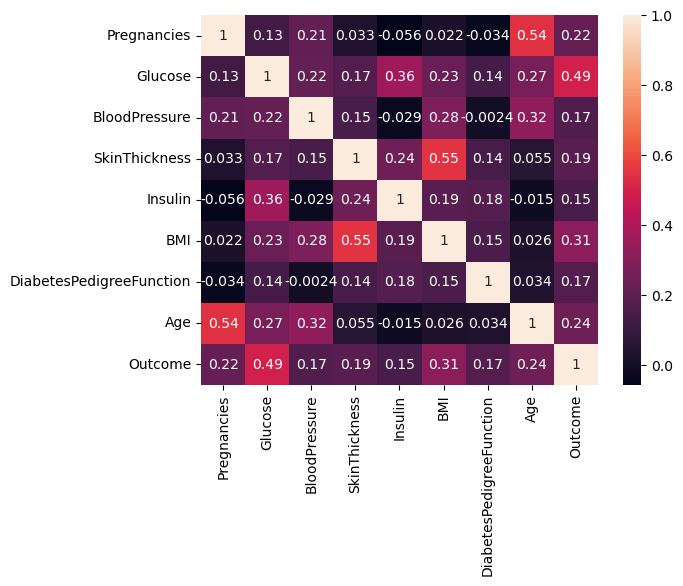

In [23]:
sns.heatmap(df.corr(), annot = True)

<Axes: xlabel='Outcome', ylabel='count'>

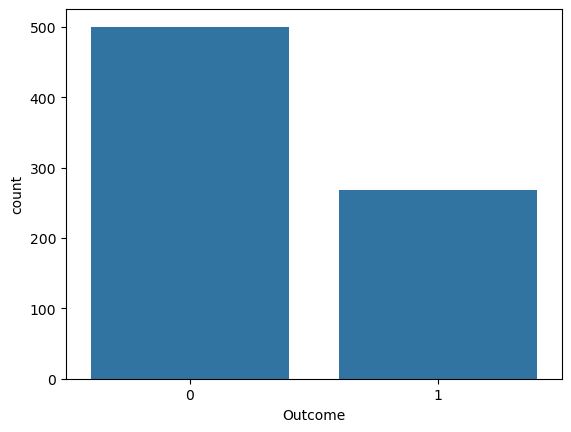

In [24]:
sns.countplot(x = "Outcome", data = df)

In [25]:
# building model

In [43]:
# splitting features
x = df.drop("Outcome", axis = 1)  # this is used to predict, axis=1 is used to drop one column,                these are features basically inputs
y = df["Outcome"] # this is getting predicted                                                                  these are target basically outputs

In [51]:
# splitting data into train(80%) and test(20%)
# test_size = 0.2 here is for 20% of the data
# random_state = 42 is used so that data split is always the same and not random, we can use any number using 42 is not necessary
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42) 

In [52]:
x_train # 614 rows and 8 columns
x_test # 154 rows and 8 coumns

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190.0,34.0,0.430,43
324,2,112,75,32,30.5,35.7,0.148,21
624,2,108,64,23,30.5,30.8,0.158,21
690,8,107,80,23,30.5,24.6,0.856,34
473,7,136,90,23,30.5,29.9,0.210,50
...,...,...,...,...,...,...,...,...
355,9,165,88,23,30.5,30.4,0.302,49
534,1,77,56,30,56.0,33.3,1.251,24
344,8,95,72,23,30.5,36.8,0.485,57
296,2,146,70,38,360.0,28.0,0.337,29


In [56]:
# creating model
# using logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [59]:
# checking accuracy
print(accuracy_score(y_test, y_pred))

0.7597402597402597


In [76]:
# checking if the model is cheating
print(classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



In [77]:
# reworking losgistic regression(its simpler and faster)
# import standardscaler from sklearn
# normalizing the data

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [83]:
# Logistic regression rework
model = LogisticRegression(max_iter = 1000)
model.fit(x_train_scaled, y_train)
y_pred_scaled = model.predict(x_test_scaled)

In [85]:
# checking accuracy
# checking the classifications to see whether it learned properly or not
print(accuracy_score(y_test, y_pred_scaled))
print(classification_report(y_test, y_pred_scaled))

0.7662337662337663
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



In [86]:
# barely any improvement, hence dropping the model

In [71]:
# trying a different model
# using random forest

In [73]:
# imported RandomForestClassifier from sklearn
rf_model = RandomForestClassifier(random_state  = 42)

In [74]:
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

In [75]:
# checking accuracy
print(accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

0.7532467532467533
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [89]:
# reworking random forest using the normalizing same as we did for logistic regression

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [92]:
# Random forest Rework
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(x_train_scaled, y_train)
rf_pred_scaled = rf_model.predict(x_test_scaled)

In [93]:
print(accuracy_score(y_test, rf_pred_scaled))
print(classification_report(y_test,rf_pred_scaled))

0.7662337662337663
              precision    recall  f1-score   support

           0       0.82      0.81      0.82        99
           1       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [ ]:
# not much improvement in recall

In [ ]:
# Trying another model
# Gradient Boosting

In [97]:
# imported gradientboostingclassifier

gb_model = GradientBoostingClassifier(random_state = 42)
gb_model.fit(x_train, y_train)

# predicting
y_pred_gb = gb_model.predict(x_test)

# accuracy and classification
print(accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

0.7337662337662337
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        99
           1       0.61      0.71      0.66        55

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154



In [99]:
# saving the best model, here its gradient boosting

# import pickle

# saving model
with open("diabetes_model.pkl", "wb") as f:
    pickle.dump(gb_model, f)

In [19]:
# rough area- basically rough code, checking
#df['BMI'].dtype
df['Insulin'].dtype

dtype('float64')

In [ ]:
True